# Projet math info

In [1]:
import autograd
from autograd import numpy as np
import matplotlib.pyplot as plt

def find_seed(g, c = 0, eps = 2.0**(-26)):
    maxi = 1.0
    mini = 0.0
    if (c < g(0,0) and c < g(0,1)) or (c > g(0,0) and c > g(0,1)):
        return None
    else:
        while maxi - mini > eps:
            milieu = (mini + maxi)/2.0
            if (g(0,milieu) - c) * (g(0,maxi) - c) >= 0.0:
                maxi = milieu
            else :
                mini = milieu
        return (maxi + mini)/2.0


def grad(f, x, y):
    g = autograd.grad
    return np.r_[g(f, 0)(x, y), g(f, 1)(x, y)]

def jacob(f, x, y):
    j = autograd.jacobian
    return np.c_[j(f, 0)(x, y), j(f, 1)(x, y)]
def newton(F,X0):
    """X0 doit être un array"""
    Xk=X0
    J = jacob(F, Xk[0], Xk[1])
    Jinv = np.linalg.inv(J)
    Fk = F(Xk[0], Xk[1])
    J2 = np.dot(Jinv, Fk)
    Xkp1 = Xk - J2
    while  np.linalg.norm(Xkp1 - Xk) > 10**(-4):
        Xk = Xkp1
        J = jacob(F, Xkp1[0], Xkp1[1])
        Jinv = np.linalg.inv(J)
        Fk = F(Xkp1[0], Xkp1[1])
        J2 = np.dot(Jinv, Fk)
        Xkp1 = Xkp1 - J2
        
    return Xkp1




def simple_contour (f, c = 0.0, delta = 0.01):
    t = find_seed(f, c, eps = 2.0**(-26))
    if t == None:
        return [],[]
    lsx = [0.0]
    lsy = [t]
    x0 = lsx[-1]
    y0 = lsy[-1]
    def F(x,y):
            return np.r_[f(x, y) - c, (x-x0)**2 + (y-y0)**2 - delta**2]
    while lsx[-1] >= 0.0 and lsx[-1] <= 1.0 and lsy[-1] >= 0.0 and lsy[-1] <= 1.0:
        x0 = lsx[-1]
        y0 = lsy[-1]
        X0 = np.r_[x0, y0]
        gradient = grad(f, x0, y0)
        coeffdir = np.r_[-gradient[1], gradient[0]]
        Xk = X0 + delta / np.linalg.norm(coeffdir) * coeffdir
        Xkp1 = newton(F,Xk)
        lsx += [Xkp1[0]]
        lsy += [Xkp1[1]]
    return lsx, lsy



## premier test (arc de cercle)

c:\users\bruno\miniconda3\lib\site-packages\autograd\numpy\numpy_wrapper.py:66: UserWarning: r_ is slow for array inputs. np.concatenate() is faster.
  "np.concatenate() is faster.".format(slow_op_name))


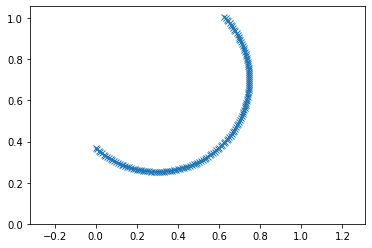

In [2]:
def f(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2
def g(x,y):
    return ((x-0.3)**2 + (y-0.7)**2)/2


a=simple_contour(f,0.1)
plt.plot(a[0],a[1], marker='x')

gnp=np.vectorize(g)

X = np.arange(0, 1, 0.01)
Y = np.arange(0, 1, 0.01)
X, Y = np.meshgrid(X, Y)
Z = gnp(X, Y)
plt.axis('equal')
plt.contour(X, Y, Z, [0.1])

plt.axis('equal')
plt.show()